In [10]:
#IN-LAB
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [11]:
df = pd.read_csv(r"C:\Nesta\KL\SEM 4\ML\Lab\Titanic-Dataset.csv")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Missing values per column:\n", df.isnull().sum())

# Impute missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop irrelevant columns
irrelevant_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=irrelevant_cols, inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())

Rows: 891
Columns: 12
Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treating outliers by capping
df['Fare'] = np.where(df['Fare'] < lower_bound, lower_bound, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_bound, upper_bound, df['Fare'])

# One-hot encoding for Sex and Embarked
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Label encoding for remaining categorical columns
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])



In [13]:
display(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,65.6344,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("\nDataset Split Shapes")
print("---------------------")
print("Training Set   :", X_train.shape, y_train.shape)
print("Validation Set :", X_val.shape, y_val.shape)
print("Testing Set    :", X_test.shape, y_test.shape)



Dataset Split Shapes
---------------------
Training Set   : (623, 8) (623,)
Validation Set : (134, 8) (134,)
Testing Set    : (134, 8) (134,)


In [16]:
# POST-LAB
# 1) Implement KNN imputation for the 'Age' column and compare with median imputation

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

df = pd.read_csv(r"C:\Nesta\KL\SEM 4\ML\Lab\Titanic-Dataset.csv")

# Median imputation
df_median = df.copy()
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())

# KNN imputation
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[['Age']] = imputer.fit_transform(df_knn[['Age']])

print("Median Age:", df_median['Age'].median())
print("KNN Imputed Age Mean:", df_knn['Age'].mean())


Median Age: 28.0
KNN Imputed Age Mean: 29.69911764705882


In [19]:
#2. Apply different outlier treatment methods (capping, removal) and compare results
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Capping
df_cap = df.copy()
df_cap['Fare'] = np.where(df_cap['Fare'] < lower, lower, df_cap['Fare'])
df_cap['Fare'] = np.where(df_cap['Fare'] > upper, upper, df_cap['Fare'])

# Removal
df_remove = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]

print("Original size:", df.shape)
print("After capping:", df_cap.shape)
print("After removal:", df_remove.shape)



Original size: (891, 12)
After capping: (891, 12)
After removal: (775, 12)


In [20]:
# 3. Perform feature scaling using StandardScaler on numerical features
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df_scaled = df_cap.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print(df_scaled[num_cols].head())



        Age      Fare     SibSp     Parch
0 -0.530377 -0.820552  0.432793 -0.473674
1  0.571831  2.031623  0.432793 -0.473674
2 -0.254825 -0.787578 -0.474545 -0.473674
3  0.365167  1.419297  0.432793 -0.473674
4  0.365167 -0.781471 -0.474545 -0.473674


In [21]:
# 4. Save the pre-processed datasets as CSV files
df_median.to_csv("titanic_median_imputed.csv", index=False)
df_knn.to_csv("titanic_knn_imputed.csv", index=False)
df_scaled.to_csv("titanic_scaled.csv", index=False)

print("Pre-processed datasets saved successfully")



Pre-processed datasets saved successfully


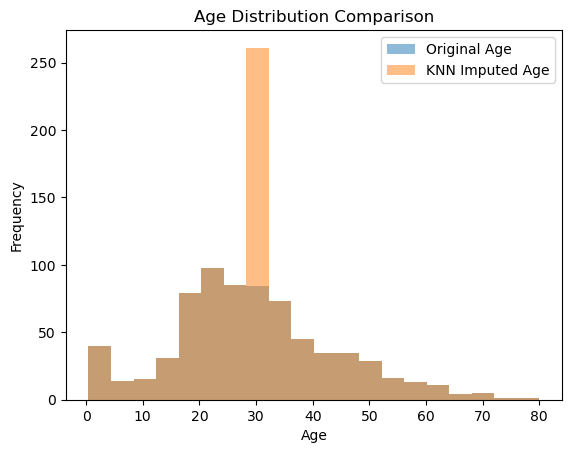

In [22]:
# 5. Create visualizations comparing original vs processed data
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Age'].dropna(), bins=20, alpha=0.5, label='Original Age')
plt.hist(df_knn['Age'], bins=20, alpha=0.5, label='KNN Imputed Age')
plt.legend()
plt.title("Age Distribution Comparison")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
